In [36]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Principal Component Analysis

PCA is fundamentally a **dimensionality reduction** algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9, 7)})

Lets get some intuition by looking at a 2-dimensional dataset:

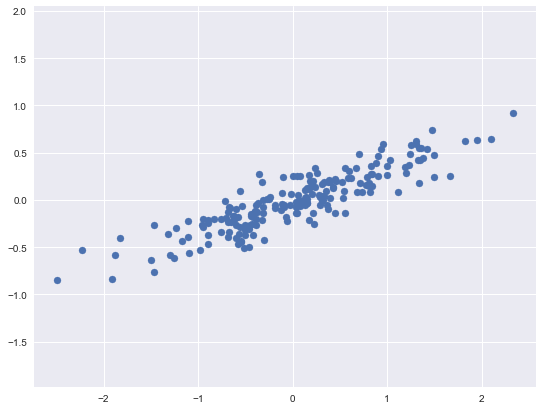

In [74]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

If we want compress the data to one dimension:
+ Project over x axis

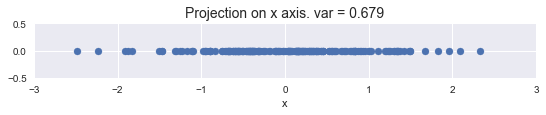

In [76]:
var = np.var(X[:,0])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X[:,0], [0]*X.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('x')
plt.title(f'Projection on x axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

+ project over y axis

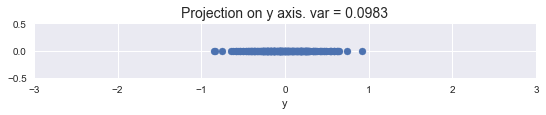

In [77]:
var = np.var(X[:,1])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X[:,1], [0]*X.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('y')
plt.title(f'Projection on y axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

But we could do better.

Project over a new axis that preserves the maximum variance as possible:

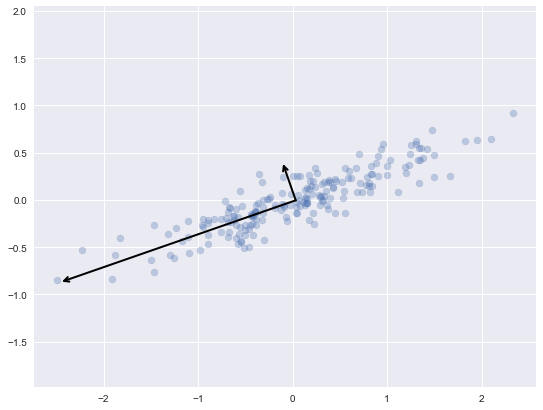

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

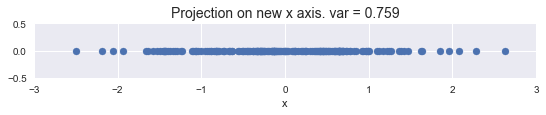

In [95]:
# project over max var axis
# dot product with eigenvector

X_new = X.dot(pca.components_)
var = np.var(X_new[:,0])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X_new[:,0], [0]*X_new.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('New x')
plt.title(f'Projection on new x axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

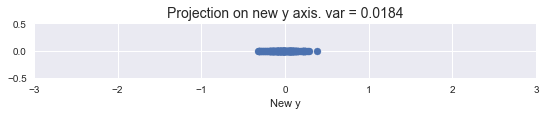

In [96]:
var = np.var(X_new[:,1])

fig, ax = plt.subplots(figsize=(9,1))
ax.scatter(X_new[:,1], [0]*X_new.shape[0])
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-3, 3)
ax.set_xlabel('New y')
plt.title(f'Projection on new y axis. var = {var:.3}', fontsize=14)
#ax.set_axis_off()
plt.show()

Nice! Now we have a projection into one dimension that maintains more variance.  

We can interpret variance as a information proxy.